# Preprocessing Data
First, the data needs to be preprocessed. Preprocessing steps include:
- Dropping irrelevant columns
- Renaming columns


### Importing data
First, the data has to be imported. This will be done by connecting to the SQLite3 database file. 

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('./data/properties.db')
df = pd.read_sql_query("SELECT * FROM properties", conn)
conn.close()

### Cleaning Columns
Now that the dataset is imported, the columns have to be cleaned. First, irrelevant columns are dropped. After that, the remaining columns are renamed to make the workflow more organised.

In [2]:
# Dropping columns
df = df.drop(columns=[
        "balkondakterras", "bouw-accessibility", "bouw-isreadyforconstruction",
        "bouw-keurmerken", "bouwperiode", "cadastral-fees", "cadastral-parcel",
        "cat18", "cat3", "cat35", "cat42", "eigendomssituatie", "erfpacht",
        "gebruiksoppervlakten", "geen-informatie-1-1", "globalid", "huurprijs",
        "huurprijsrange", "indeling-capacity", "indeling-dimensions",
        "kantoorruimte", "laatste-vraagprijs", "neighborhood_id",
        "oorspronkelijke-huurprijs", "oorspronkelijke-vraagprijs", "oppervlakte",
        "overdracht-aangeboden-sinds", "overdracht-buyersprogram",
        "overdracht-huurovereenkomst", "overdracht-huurprijs",
        "overdracht-waarborgsom",
        "parkeergelegenheidopafgeslotenterrein",
        "parkeergelegenheidopeigenterrein", "perceel",
        "praktijkruimte", "project_type", "servicekosten",
        "soort-parkeergelegenheid", "soortaanbod", "taal", "tinyid", "overdracht-status",
        "adgroup", "bouw-bijzonderheden", "cat33", "cat34", "voorzieningen", "status", 
        "soortaanbieding", "soort-garage", "schuurberging", "provincie",
        "periodieke-bijdrage", "opstalverzekering", "openhuis", "offering_type",
        "onderhoudsplan", "soort-object", "isolatie", "inschrijving-kvk", 
        "indeling-generalfacilities","indeling-bathroom", "hoofdaanbieder", 
        "energie-warmwate", "energie-verwarming", "energie-isolatie", "energie-energielabel", 
        "energie-cv", "buitenruimte-liggingtuin", "buitenruimte-hoofdtuin", 
        "buitenruimte-balkonterras", "bouw-bouwjaar", "bouwdak", "cat2", "cat4", "cat5", 
        "cat7", "cat8", "cat9","cat10", "cat12", "cat13", "cat20", "cat24", "cat26", 
        "cat29", "cat30", "cat39", "cat44", "cat38", 
        "afmetingen-gebruiksoppervlakte-externebergruimte",
        "afmetingen-gebruiksoppervlakte-gebouwgebondenbuitenruimte", 
        "afmetingen-gebruiksoppervlakte-overigeinpandigeruimte", "bouw-dak",
        "buitenruimte-ligging", "buitenruimte-tuin", "cadastral-ownershipsituation",
        "capaciteit", "cat1", "cvketel", "energie-warmwater", "overdracht-bijdragevve",
        "reservefonds-aanwezig", "cat8", "cat9", "living_area_m2", "afmetingen-gebruiksoppervlakten-wonen",
        "cat24", "cat36", "cat43", "cat44", "fixer_upper", "plaats", "cat11",
        "monumentalestatus", "national_monument", "overdracht-vraagprijs",
        "cat29", "cat28", "cat30", "cat4", "cat6", "jaarlijkse-vergadering", "indeling-locatedat", "cadastral-area",
        "vraagprijsrange", "indeling-totalrooms", "afmetingen-inhoud", "bouw-soortobject", 
        "branchevereniging", "gemeente", "huisnummertoevoeging", "soortwoning", 
        "overdracht-vraagprijsperm2", "buurt", "soortobject", "bouw-soortbouw", "huisnummer", "postcode"
    ], errors="ignore")

# Renaming columns
df = df.rename(columns={
    "aantalkamers": "rooms",
    "balkon": "has_balcony",
    "bedrijfsruimte": "commercial_space",
    "bouwjaar": "year_built",
    "bouw-bouwsoort": "build_type",
    #"branchevereniging": "branch_association",
    "tuin": "has_garden",
    "vraagprijs": "price",
    "woonoppervlakte": "living_area",
    "zonnepanelen": "has_solar_panels",
    "warmtepomp": "has_heat_pump",
    "soort-woning": "property_type",
    "rijksmonument": "national_monument",
    "kluswoning": "fixer_upper",
    "monumentelestatus": "monument_status",
    "energiezuinig": "energy_efficient",
    "energieklasse": "energy_label",
    "bouwvorm": "building_form",
    "dakterras": "has_roof_terrace",
    "afmetingen-perceel": "plot_area_m2",
    #"bouw-soortbouw": "construction_type",
    #"bouw-soortobject": "construction_object_type",
    #"buurt": "neighborhood",
    #"gemeente": "municipality",
    #"huisnummer": "house_number",
    #"huisnummertoevoeging": "house_number_suffix",
    "indeling-totalbathroom": "total_bathrooms",
    "indeling-totalstories": "total_stories",
    "lat": "latitude",
    "lng": "longitude",
    #"overdracht-vraagprijsperm2": "asking_price_per_m2",
    #"soortobject": "object_category",
    #"soortwoning": "property_subtype",
    }, errors="ignore")

df = df.reindex(sorted(df.columns), axis=1)

print("Columns after dropping and renaming:")
print(df.columns.tolist())


Columns after dropping and renaming:
['bedrooms', 'building_form', 'city', 'commercial_space', 'days_on_market', 'energy_efficient', 'energy_label', 'fixer_upper', 'has_balcony', 'has_garden', 'has_heat_pump', 'has_roof_terrace', 'has_solar_panels', 'latitude', 'living_area', 'longitude', 'national_monument', 'object_type', 'plot_area_m2', 'postcode4', 'price', 'province', 'publication_date', 'rooms', 'total_bathrooms', 'total_stories', 'url', 'year_built']


In [3]:
import re, numpy as np, pandas as pd

RE_PRICE  = re.compile(r"[€\s.,]|kosten koper|k\.k\.", re.I)
RE_AREA   = re.compile(r"\s*m[²2]|[.,]")
RE_VOLUME = re.compile(r"\s*m[³3]|[.,]")

def _clean_numeric(series: pd.Series, regex=None, want_float=False) -> pd.Series:
    """
    Strip unwanted chars with `regex`, coerce to numeric, and return
    a nullable integer (Int64) unless `want_float=True`.
    """
    if regex is not None:
        series = (
            series.astype(str)
                  .str.replace(regex, "", regex=True)
                  .replace({"": np.nan})
        )
    ser_num = pd.to_numeric(series, errors="coerce")
    return ser_num.astype("float64") if want_float else ser_num.round().astype("Int64")

def tidy(df: pd.DataFrame) -> pd.DataFrame:
    # prices
    for col in ["asking_price", "asking_price_per_m2"]:
        if col in df.columns:
            df[col] = _clean_numeric(df[col], RE_PRICE)

    # areas
    for col in ["living_area", "plot_area_m2"]:
        if col in df.columns:
            df[col] = _clean_numeric(df[col], RE_AREA)
            df[col] = df[col].fillna(0).astype("Int64")

    # volumes
    for col in ["volume_cubic_m"]:
        if col in df.columns:
            df[col] = _clean_numeric(df[col], RE_VOLUME)

    # plain integers
    for col in [
        "rooms", "bedrooms",
        "year_built", "days_on_market"  # add if present
    ]:
        if col in df.columns:
            df[col] = _clean_numeric(df[col])

    # floats (coords)
    for col in ["latitude", "longitude"]:
        if col in df.columns:
            df[col] = _clean_numeric(df[col], want_float=True)

    # yes/no flags stored as "0"/"1" (or "ja"/"nee")
    bool_cols = [
        "has_balcony", "has_garden", "has_roof_terrace",
        "has_solar_panels", "has_heat_pump",
        "fixer_upper", "national_monument", "energy_efficient",
        "commercial_space"
    ]
    for col in bool_cols:
        if col in df.columns:
            df[col] = (
                df[col].replace({"0": 0, "1": 1, "ja": 1, "nee": 0, "yes": 1, "no": 0})
                       .astype("Int8")         # tiny nullable int (0/1/NA)
            )

    #### STORIES: REGEX: X WOONLA
    if "total_stories" in df.columns:
        df["has_basement"] = df["total_stories"].str.contains("kelder", case=False, na=False).astype("Int8")
        df["has_attic"] = df["total_stories"].str.contains("zolder", case=False, na=False).astype("Int8")
        df["stories"] = (
            df["total_stories"]
            .str.extract(r"(\d+)\s*woonla", expand=False)
            .astype("float")
            .astype("Int64")
        )
        df = df.drop(columns=["total_stories"])

    #### BATHROOMS: REGEX: X BADKAMER
    if "total_bathrooms" in df.columns:
        #df["bathrooms"] = (
        #    df["total_bathrooms"]
        #    .str.extract(r"(\d+)\s*badkamer", expand=False)
        #    .astype("float")
        #    .astype("Int64")
        #)
        #df["separate_toilets"] = (
        #    df["total_bathrooms"]
        #    .str.extract(r"(\d+)\s*apart toilet", expand=False)
        #    .astype("float")
        #    .astype("Int64")
        #)

        df = df.drop(columns=["total_bathrooms"])
    
    # only include where publication date == 2024
    if "publication_date" in df.columns:
        df = df[df["publication_date"].str.startswith("2024")]

    return df

df = tidy(df)




/var/folders/dm/_tq0dqfd50b73lqr6vh5dcwh0000gn/T/ipykernel_2209/298466462.py:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({"0": 0, "1": 1, "ja": 1, "nee": 0, "yes": 1, "no": 0})


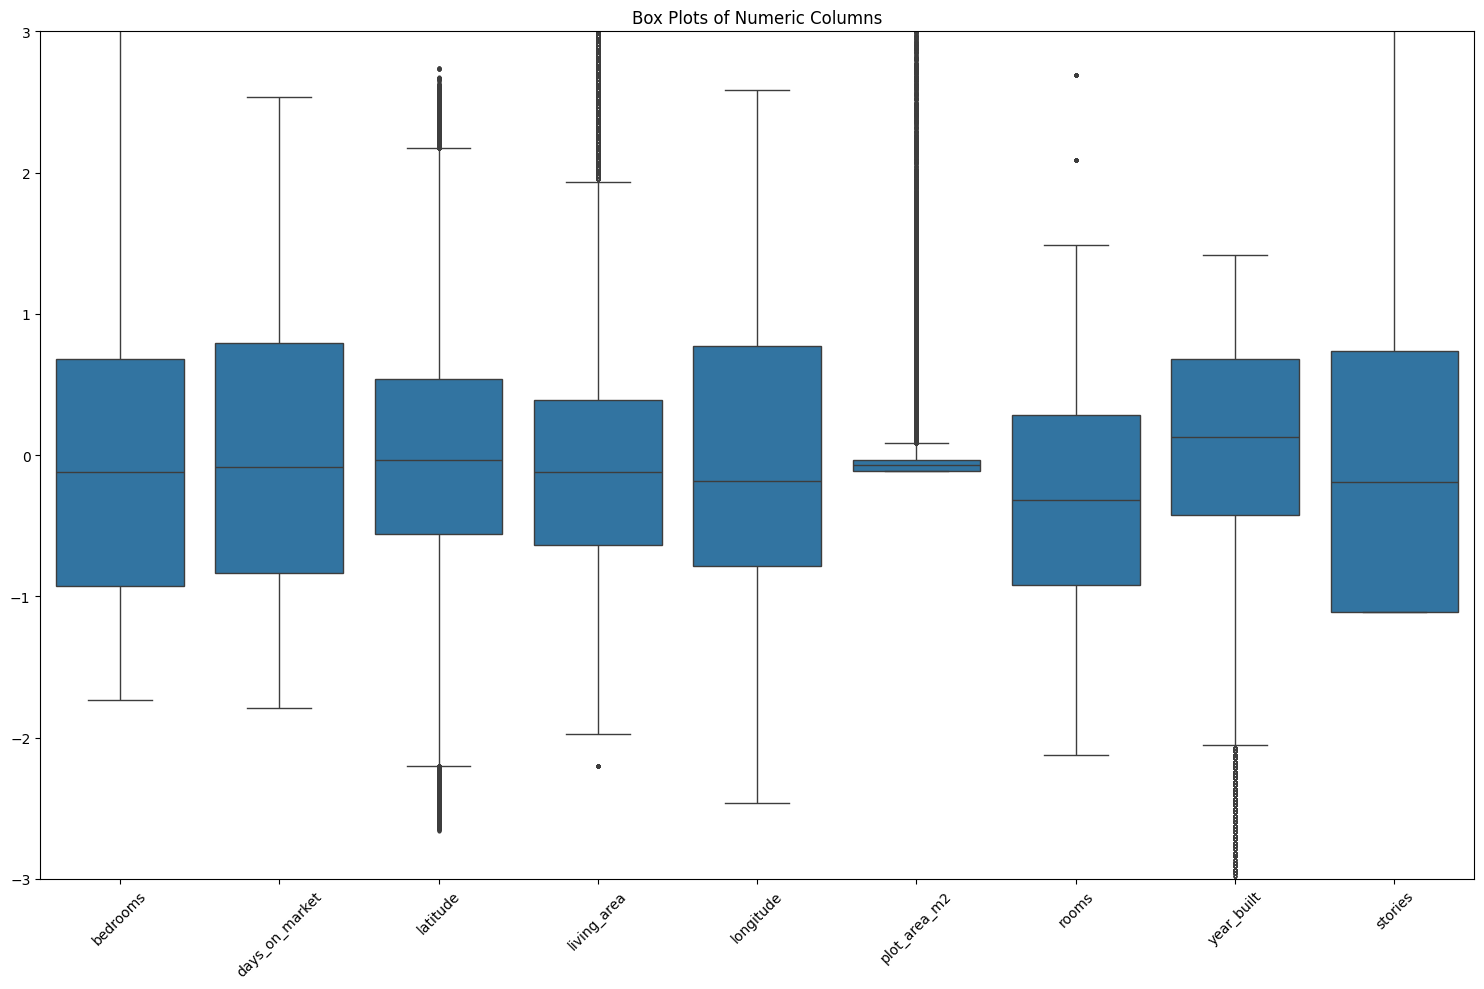

In [19]:
# create one plot with box plots of all numeric columns (Standardize the column values)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(15, 10))
# Select numeric columns, but remove binary (0/1) features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
# Remove columns that are strictly binary (0/1 or -1/1 or only two unique values)
binary_cols = [col for col in numeric_cols if df[col].dropna().nunique() == 2]
numeric_cols = [col for col in numeric_cols if col not in binary_cols]

# Standardize numeric columns to mean 0 and std 1
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

if numeric_cols:
    sns.boxplot(data=df[numeric_cols], color='tab:blue', fliersize=2)
    plt.xticks(rotation=45)
    plt.title('Box Plots of Numeric Columns')
    plt.tight_layout()
    plt.ylim(-3, 3)  # Adjust y-axis limits to focus on standardized values
    plt.savefig('./plots/outliers_boxplots.png')
    plt.show()



### Save db to new file

In [ ]:

# Save to new SQLite database
conn = sqlite3.connect('./data/properties_cleaned.db')
df.to_sql('properties', conn, if_exists='replace', index=False)
conn.close()